# Motivations Study

Exist survye about motivations after interview.

https://docs.google.com/forms/d/1ziVpPadyIT-FjsDK7fMIQzAWI1_iiEXvZGvBOq6hG4M/viewform

In [2]:

library(dplyr)
library(ggplot2)
source("/Users/kristian/PycharmProjects/Frame_experiment_analysis/stacked_bars.R")
source('~/Dropbox/case_sysmo/Scripts/mainSysmo.r')
data <- read.csv(file=paste0("/Users/kristian/Dropbox/case_sysmo/Data/MotivationsResponsesFormResponses-csv.csv"),sep=",",head=TRUE)
data$date <- as.Date(data$Timestamp )


In [3]:
names(data)

[1] "Timestamp"     "project00"     "discipline00"  "openMotive00" 
 [5] "access00"      "withhold00"    "mot_ext_eth"   "mot_int"      
 [9] "mot_ext_soc00" "mot_ext_mat00" "mot_ext_soc01" "mot_ext_02"   
[13] "mot_ext_mat01" "date"

In [6]:
graph_usability<-function(mot_ext_eth, 
                          mot_ext_soc00, 
                          mot_ext_soc01, 
                          mot_ext_soc02, mot_ext_mat00, 
                          mot_ext_mat01,
                          mot_int){
    cc <-brewer.pal(5, "RdYlBu")
 #   cc <-colorRampPalette(brewer.pal(6, 'PuBu'))(30)
#     cc <- cc[c(9,13,19,27)]
    likertLabels<- c("Strongly Disagree", "Disagree", "Neither", "Agree", "Strongly Agree")

    mot_ext_eth <- data.frame(mot_ext_eth)
    mot_ext_soc00 <- data.frame(mot_ext_soc00)
    mot_ext_soc01 <- data.frame(mot_ext_soc01)
    mot_ext_soc02 <- data.frame(mot_ext_soc02)
    mot_ext_mat00 <- data.frame(mot_ext_mat00)
    mot_ext_mat01 <- data.frame(mot_ext_mat01)
    mot_int <- data.frame(mot_int)

    myList5 <- list(mot_ext_eth,mot_ext_soc00,mot_ext_soc01,mot_ext_soc02,mot_ext_mat00,mot_ext_mat01,mot_int )
    junto <-do.call(rbind.fill, myList5)
    djunto <- data.frame(junto)
    mydata2 <- junto

    DFG <- lapply(mydata2, factor, levels = likertLabels)
    d <- data.frame(DFG)
    df24<-likert(d)
    s<- plot(df24, color=cc,text.size=4, center=3, 
             plot.percent.low=TRUE, plot.percent.high=TRUE, 
             ordered=FALSE, group.order=names(d))
    s 

}

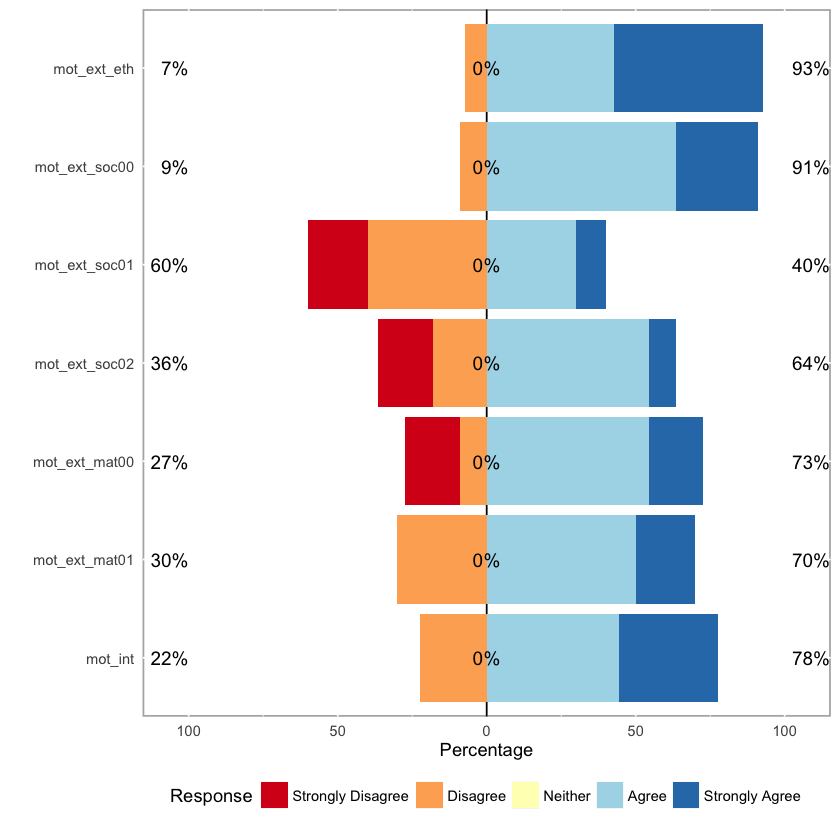

In [7]:
graph_usability(data$mot_ext_eth, 
                data$mot_ext_soc00, 
                data$mot_ext_soc01, 
                data$mot_ext_02,
                data$mot_ext_mat00, 
                data$mot_ext_mat01,
                data$mot_int)

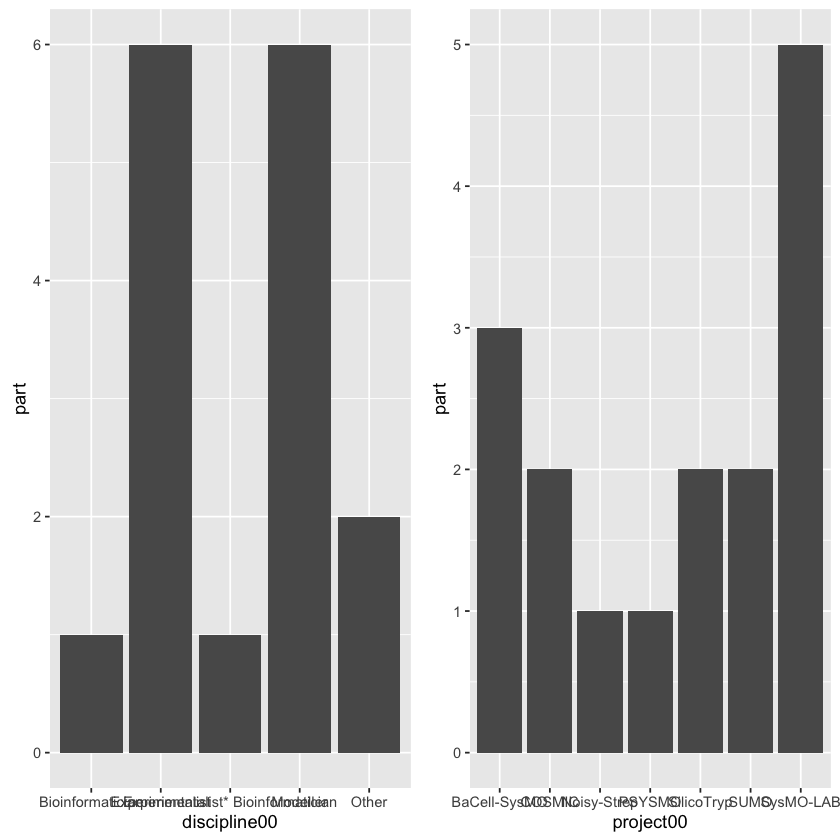

In [98]:
x = data %>% group_by(discipline00) %>% summarise(part=n())
p1 <- ggplot(x, aes(discipline00,part)) + geom_bar(stat="identity")

x = data %>% group_by(project00) %>% summarise(part=n())
p2<- ggplot(x, aes(project00,part)) + geom_bar(stat="identity")

multiplot(p1,p2, cols=2)